In [225]:
import pandas as pd
import pandas as pd
import geopandas as gpd
import matplotlib.pylab as plt
import seaborn

import statistics
import scipy.stats

import pylab as pl
from scipy.optimize import curve_fit, minimize

import os
import requests
import json
import io
from fiona.crs import from_epsg
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib 
import zipfile 

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

import shapely
import pysal as ps

%matplotlib inline

In [90]:
import pandas as pd
import numpy as np
import os
import zipfile 
import pylab as pl
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib 
    

    
# Make sure the environmental variable works
puidata = os.getenv("PUIDATA")
if not puidata or puidata == 'nfshome/tm1722/PUIdata':
    puidata = '/nfshome/tm1722/PUIDATA'
    
os.environ["PUIDATA"] = puidata

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

## Downloading Data

In [2]:
# Download the Guardian murders and ownership data
!curl https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv > firearms.csv
!mv firearms.csv $PUIDATA 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7852  100  7852    0     0  73763      0 --:--:-- --:--:-- --:--:-- 74075


In [15]:
# Download World population by country data
# Access API with parameters given by the user when running the file
url = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"

urllib.urlretrieve(url, puidata + '/wb_pop_by_country.zip')
zip_ref = zipfile.ZipFile(puidata + '/wb_pop_by_country.zip', 'r')
zip_ref.extractall(puidata)
zip_ref.close()



In [21]:
# Download GDP by country data
# Access API with parameters given by the user when running the file
url = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"

urllib.urlretrieve(url, puidata + '/gdp_by_country.zip')
zip_ref = zipfile.ZipFile(puidata + '/gdp_by_country.zip', 'r')
zip_ref.extractall(puidata)
zip_ref.close()

In [30]:
# Download Gun shootings by Country dataset
url = 'data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78'
urllib.urlretrieve(url, puidata + '/guns_shootings_by_country.txt')


('/nfshome/tm1722/PUIdata/guns_shootings_by_country.txt',
 <email.message.Message at 0x7fb78858e9e8>)

## Reading in data

In [71]:
firearms = pd.read_csv(puidata + '/firearms.csv', usecols=['Country/Territory', 
                                                           'Average total all civilian firearms',
                                                           'Number of homicides by firearm'])
firearms.columns = ['Country', 'Number of homicides by firearm', 'Average total all civilian firearms']
firearms.head()

,Country,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [64]:
guns_shootings_by_country = pd.read_csv(puidata + '/guns_shootings_by_country.txt')
guns_shootings_by_country.columns = ['Country','Guns/100 inhabitants','Number of mass shootings']
guns_shootings_by_country.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [76]:
pop = pd.read_csv(puidata + '/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv', skiprows=4, usecols=['Country Name', '2012'])
pop.columns = ['Country', 'pop']
pop.head()

,Country,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [77]:
gdp = pd.read_csv(puidata + '/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv', skiprows=4, usecols={'Country Name':'Country', '2012':'gdp'})
gdp.columns = ['Country', 'gdp']
gdp.head()

,Country,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


## Merging data

In [78]:
dataframes = [firearms, guns_shootings_by_country, pop, gdp]

In [84]:
df_ = reduce(lambda left,right: pd.merge(left,right,on=['Country']), dataframes)
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,pop,gdp
0,Australia,30.0,3050000.0,15.0,4,22742475.0,1.543411e+12
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.094252e+11
2,Belgium,70.0,1800000.0,17.2,2,11128246.0,4.978842e+11
3,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12
4,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11


In [85]:
df_merged.shape

(23, 7)

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


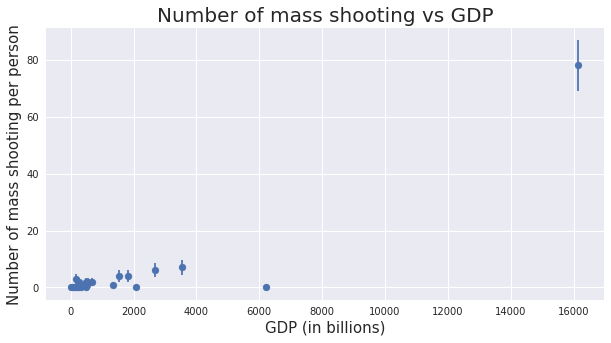

In [105]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)", fontsize=15)
ax.set_ylabel("Number of mass shooting per person", fontsize=15)
ax.set_ylim()
pl.title('Number of mass shooting vs GDP', fontsize=20)
pl.show()

Figure 1. Number of mass shooting vs GDP, " errors represent Poisson statistics.
- The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings.")
- We can see that the GDP and Number of shootngs for the US are muc much higher than all the other countries. Some of it might be explained by US being a huge country with big population, but there is probably more to it (and it probably has to do with gun control policies in the US which are much more lax compared to other countries, at least based on common knowledge and media perception).



In [108]:
# Create GDP per person column
df_['gdp_pp'] = df_['gdp'] / df_['pop'] 
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,gdp_pp
0,Australia,30.0,3050000.0,15.0,4,22742475.0,1.543411e+12,0.000176,67864.689862
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.094252e+11,0.000119,48567.695286
2,Belgium,70.0,1800000.0,17.2,2,11128246.0,4.978842e+11,0.000180,44740.583248
3,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12,0.000115,52496.694870
4,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.000000,58507.500210


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


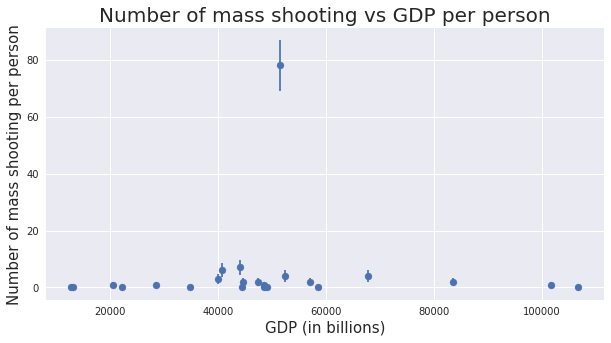

In [109]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp_pp, df_['Number of mass shootings'])
ax.errorbar(df_.gdp_pp, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)", fontsize=15)
ax.set_ylabel("Number of mass shooting per person", fontsize=15)
ax.set_ylim()
pl.title('Number of mass shooting vs GDP per person', fontsize=20)
pl.show()

Figure 2. Number of mass shooting vs GDP per person, errors represent Poisson statistics.
- The datapoint at the top is the USA. As noted before, this is expected due to gun control policies in the US

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [110]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3
df_['firearmspp'] = df_['Average total all civilian firearms'] / df_['pop']

In [111]:
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,gdp_pp,firearmspp
0,Australia,30.0,3050000.0,15.0,4,22742475.0,1.543411e+12,0.000176,67864.689862,0.134110
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.094252e+11,0.000119,48567.695286,0.296560
2,Belgium,70.0,1800000.0,17.2,2,11128246.0,4.978842e+11,0.000180,44740.583248,0.161751
3,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12,0.000115,52496.694870,0.286326
4,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.000000,58507.500210,0.116246


In [ ]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp_pp, df_.shootingspp)
ax.errorbar(df_.gdp, df_.shootingspp, 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)", fontsize=15)
ax.set_ylabel("Number of mass shooting per person", fontsize=15)
ax.set_ylim()
pl.title('Number of mass shooting vs GDP', fontsize=20)
pl.show()

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0.5,1,'Histogram: average number of homicide by fire arms per person')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


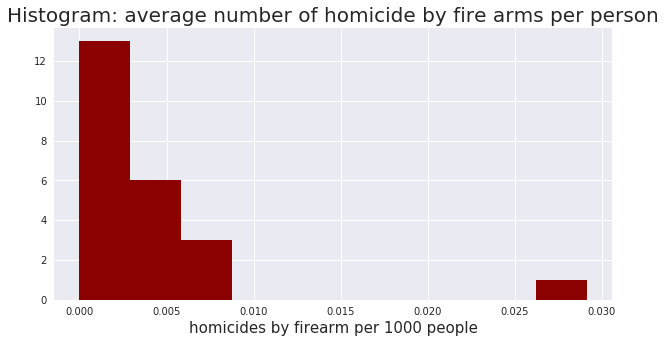

In [125]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000, color='darkred')
ax.set_xlabel('homicides by firearm per 1000 people', fontsize=15);
pl.title('Histogram: average number of homicides by fire arms per person', fontsize=20)


Figure 3. Histogram of avg. homicide numbers per 100 peoples. 
- We can see that all countries but one have less than 0.010 homicides by firearm per 100 people
- We can reasonably infer that the one that is not is the USA (has about 0.028 homicides by firearm per 100 people)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


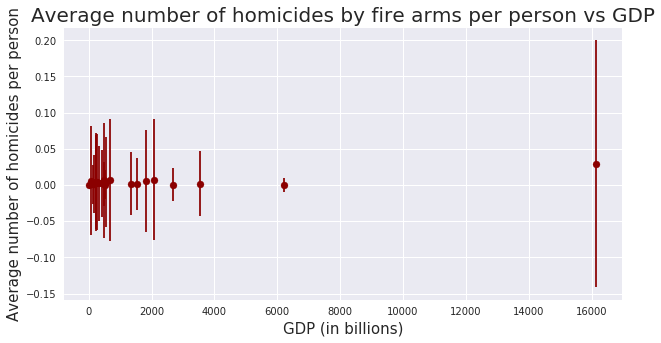

In [153]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000, c='darkred')
ax.errorbar(df_.gdp / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1000 * 1.0), fmt = '.', c='darkred')
ax.set_xlabel("GDP (in billions)", fontsize=15)
ax.set_ylabel("Average number of homicides per person", fontsize=15)
ax.set_ylim()
pl.title('Average number of homicides by fire arms per person vs GDP', fontsize=20)
pl.show()


Figure 4. Average number of homicides by fire arms per person vs GDP. 
- The point on the right is the USA. It is definitely an outlier GDP amount-wise. We saw in the previous graph that the average number of homicides per person was seemingly much higher in the US compared  to others. In this graph, it is much harder to see that, so good thing we did both a histogram and a scatterplot. 
- The statistical error for the United States' average draws immediate attention. 
- According to OECD Glossary of Statisticial terms(https://stats.oecd.org/glossary/detail.asp?ID=5058): A statistical error is the (unknown) difference between the retained value and the true value. Context: It is immediately associated with accuracy since accuracy is used to mean "the inverse of the total error, including bias and variance" (Kish, Survey Sampling, 1965). The larger the error, the lower the accuracy.
- Here, it is seemingly due to very small values for the variable


## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [149]:
# Create dataframe with just United States to plot it in a different color
df_usa = df_[df_['Country'] == 'United States']
df_usa

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,gdp_pp,firearmspp
22,United States,9146.0,270000000.0,88.8,78,313993272.0,1.615526e+13,0.000248,51450.959115,0.859891


In [154]:
scatter = ax.scatter(df_.gdp, df_['Number of homicides by firearm'], c='darkred')
ax.errorbar(df_.gdp, df_['Number of homicides by firearm'] / df_['pop'] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1.0), fmt = '.', c='darkred')


ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')

<Container object of 3 artists>

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


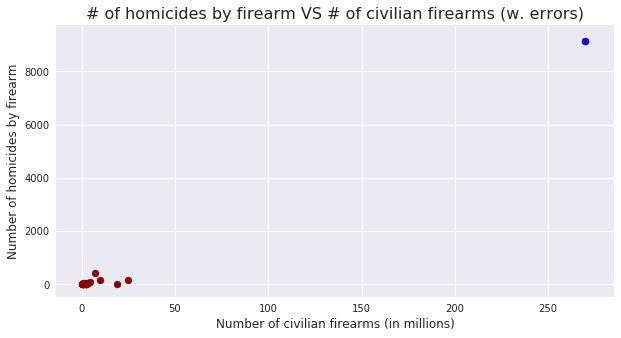

In [177]:
#plot with errors

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1000000, df_['Number of homicides by firearm'], c='darkred')
ax.errorbar(df_['Average total all civilian firearms'] / 1000000, df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0), fmt = '.', c='darkred')

scatter_usa = ax.scatter(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of homicides by firearm'], c='b')
ax.errorbar(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of homicides by firearm'], 
            yerr = np.sqrt(df_usa['Number of homicides by firearm'] * 1.0), fmt = '.', c='b')

ax.set_xlabel("Number of civilian firearms (in millions)", fontsize=12)
ax.set_ylabel("Number of homicides by firearm", fontsize=12)
ax.set_ylim()
pl.title('# of homicides by firearm VS # of civilian firearms (w. errors)', fontsize=16)
pl.show()

# CHECK GRAPH (ERRORS NOT SHOWING) & INTERPRET!!!!!!!!!!!!!!!!!!

Figure 5. # of homicides by firearm VS # of civilian firearms (w. errors)

- We can see the US in blue (again, it is an outlier). The US has both an astoundingly high number of homicides by year and AN astoundingly high number of civilian 
- Here, even though we plot errors for the number of homicides by firearm, they are very small (almost invisible). This might have to do with generally high values of the variables (at least compared to what we looked at before)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


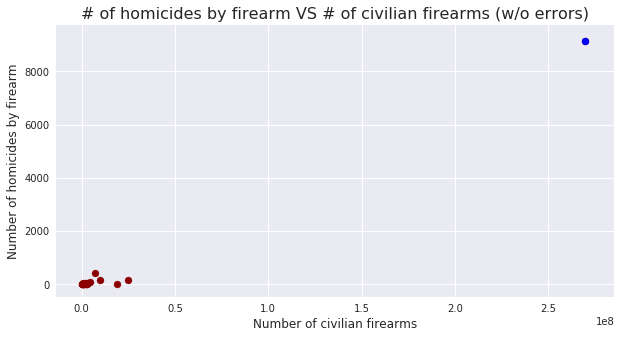

In [178]:
#plot without errors

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], c='darkred')
scatter_usa = ax.scatter(df_usa['Average total all civilian firearms'], df_usa['Number of homicides by firearm'], c='b')

#ax.errorbar(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], 
#            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0), fmt = '.', c='darkred')

#ax.errorbar(df_usa['Average total all civilian firearms'], df_usa['Number of homicides by firearm'], 
#            yerr = np.sqrt(df_usa['Number of homicides by firearm'] * 1.0), fmt = '.', c='b')

ax.set_xlabel("Number of civilian firearms", fontsize=12)
ax.set_ylabel("Number of homicides by firearm", fontsize=12)
ax.set_ylim()
pl.title('# of homicides by firearm VS # of civilian firearms (w/o errors)', fontsize=16)
pl.show()

# INTERPRET!!!!!!!!

Figure 6. # of homicides by firearm VS # of civilian firearms (w. errors)

- We can see the US in blue (again, it is an outlier)
- Here, even though we plot errors, they are very small (almost invisible) 

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [170]:
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,gdp_pp,firearmspp
0,Australia,30.0,3050000.0,15.0,4,22742475.0,1.543411e+12,0.000176,67864.689862,0.134110
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.094252e+11,0.000119,48567.695286,0.296560
2,Belgium,70.0,1800000.0,17.2,2,11128246.0,4.978842e+11,0.000180,44740.583248,0.161751
3,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12,0.000115,52496.694870,0.286326
4,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.000000,58507.500210,0.116246


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


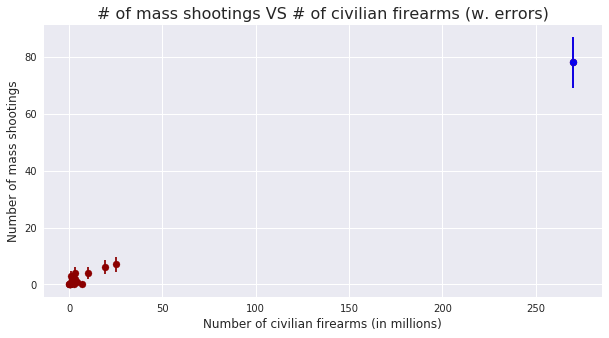

In [176]:
#plot with errors

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1000000, df_['Number of mass shootings'], c='darkred')
ax.errorbar(df_['Average total all civilian firearms'] / 1000000, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', c='darkred')

scatter_usa = ax.scatter(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of mass shootings'], c='b')
ax.errorbar(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of mass shootings'], 
            yerr = np.sqrt(df_usa['Number of mass shootings'] * 1.0), fmt = '.', c='b')

ax.set_xlabel("Number of civilian firearms (in millions)", fontsize=12)
ax.set_ylabel("Number of mass shootings", fontsize=12)
ax.set_ylim()
pl.title('# of mass shootings VS # of civilian firearms (w. errors)', fontsize=16)
pl.show()

Figure 7. # of mass shootings VS # of civilian firearms (w. errors)

- Again, the USA has much larger numbers for both Number of mass shootings and number of civilian firearms


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


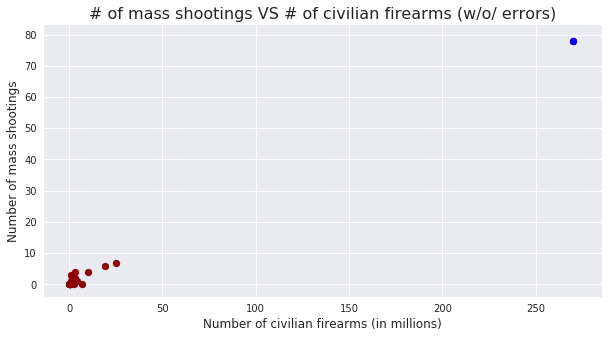

In [179]:
#plot without errors

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'] / 1000000, df_['Number of mass shootings'], c='darkred')
#ax.errorbar(df_['Average total all civilian firearms'] / 1000000, df_['Number of mass shootings'], 
#            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', c='darkred')

scatter_usa = ax.scatter(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of mass shootings'], c='b')
#ax.errorbar(df_usa['Average total all civilian firearms'] / 1000000, df_usa['Number of mass shootings'], 
#            yerr = np.sqrt(df_usa['Number of mass shootings'] * 1.0), fmt = '.', c='b')

ax.set_xlabel("Number of civilian firearms (in millions)", fontsize=12)
ax.set_ylabel("Number of mass shootings", fontsize=12)
ax.set_ylim()
pl.title('# of mass shootings VS # of civilian firearms (w/o. errors)', fontsize=16)
pl.show()

Figure 8. # of mass shootings VS # of civilian firearms (w/o. errors)

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [191]:
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,gdp_pp,firearmspp
0,Australia,30.0,3050000.0,15.0,4,22742475.0,1.543411e+12,0.000176,67864.689862,0.134110
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.094252e+11,0.000119,48567.695286,0.296560
2,Belgium,70.0,1800000.0,17.2,2,11128246.0,4.978842e+11,0.000180,44740.583248,0.161751
3,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12,0.000115,52496.694870,0.286326
4,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.000000,58507.500210,0.116246


In [203]:
firearmspp_mean = df_['firearmspp'].mean()
shootingspp_mean = df_['shootingspp'].mean()

In [230]:
df_['firearmspp_norm'] = df_['firearmspp'] / firearmspp_mean
df_['shootingspp_norm'] = df_['shootingspp'] / shootingspp_mean
df_.head()

,Country,Number of homicides by firearm,Average total all civilian firearms,Guns/100 inhabitants,Number of mass shootings,pop,gdp,shootingspp,gdp_pp,firearmspp,firearmspp_norm,shootingspp_norm
0,Australia,30.0,3050000.0,15.0,4,22742475.0,1.543411e+12,0.000176,67864.689862,0.134110,0.593366,1.423355
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.094252e+11,0.000119,48567.695286,0.296560,1.312121,0.959983
2,Belgium,70.0,1800000.0,17.2,2,11128246.0,4.978842e+11,0.000180,44740.583248,0.161751,0.715660,1.454434
3,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12,0.000115,52496.694870,0.286326,1.266842,0.931514
4,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.000000,58507.500210,0.116246,0.514328,0.000000


In [ ]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearmspp_norm'], df_['shootingspp_norm'], c='g')

ax.set_xlabel("Firearms", fontsize=12)
ax.set_ylabel("Mass Shootings", fontsize=12)
ax.set_ylim()
pl.title('Firearms per person VS Mass shootings per person (adj. for the same order of magnitude)', fontsize=16)
pl.show()

Figure 9. Firearms per person VS Mass shootings per person

In [232]:
# ols_model = smf.ols(formula = 'shootingspp ~ firearmspp', data=df_).fit()
# print(ols_model.summary())

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


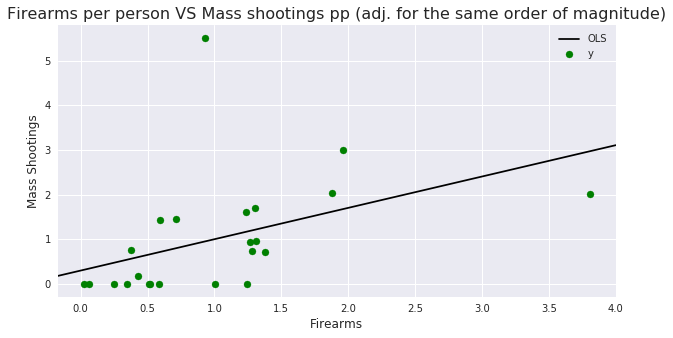

In [268]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearmspp'] / firearmspp_mean,
                     df_['shootingspp'] / shootingspp_mean, c='g', label='y')

ols_model = smf.ols(formula = 'shootingspp_norm ~ firearmspp_norm', data=df_).fit()
abline_plot(model_results=ols_model, ax=ax, color='black', label='OLS')

ax.set_xlabel("Firearms", fontsize=12)
ax.set_ylabel("Mass Shootings", fontsize=12)
ax.set_ylim()
pl.title('Firearms per person VS Mass shootings pp (adj. for the same order of magnitude)', fontsize=16)
pl.legend()
pl.show()

Figure 10. Firearms per person VS Mass shootings per person with a fitted OLS line. 

- We can see that there is a definite linear relationship between firearms per person  

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


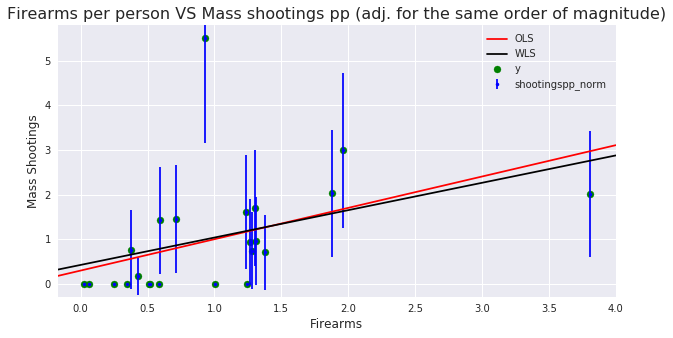

In [293]:
W = range(1,24)

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearmspp'] / firearmspp_mean,
                     df_['shootingspp'] / shootingspp_mean, c='g', label='y')

ols_model = smf.ols(formula = 'shootingspp_norm ~ firearmspp_norm', data=df_).fit()
abline_plot(model_results=ols_model, ax=ax, color='red', label='OLS')

wls_model = smf.wls(formula = 'shootingspp_norm ~ firearmspp_norm', weights=W, data=df_).fit()
abline_plot(model_results=wls_model, ax=ax, color='black', label='WLS')

ax.errorbar(df_['firearmspp_norm'], df_['shootingspp_norm'], 
            yerr = np.sqrt(df_['shootingspp_norm'] * 1.0), fmt = '.', c='b')


ax.set_xlabel("Firearms", fontsize=12)
ax.set_ylabel("Mass Shootings", fontsize=12)
ax.set_ylim()
pl.title('Firearms per person VS Mass shootings pp (adj. for the same order of magnitude)', fontsize=16)
pl.legend()
pl.show()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


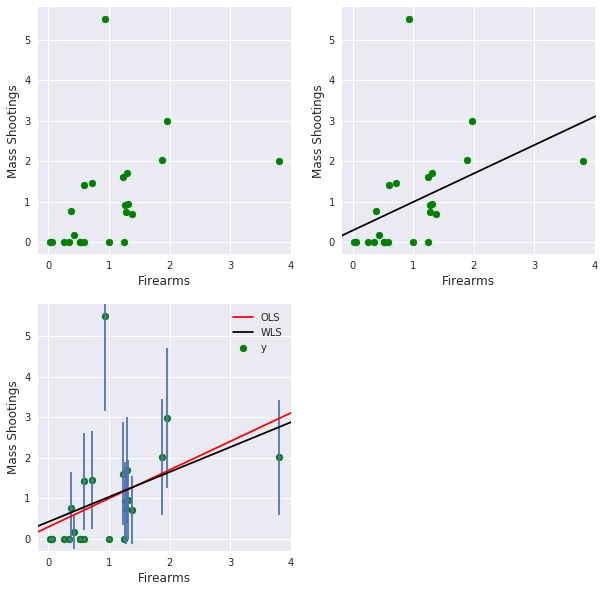

In [297]:
W = range(1,24)

fig = pl.figure(figsize=(10,10) )
ax1 = fig.add_subplot(221)
ax1.scatter(df_['firearmspp_norm'], df_['shootingspp_norm'], c='g')
ax1.set_xlabel("Firearms", fontsize=12)
ax1.set_ylabel("Mass Shootings", fontsize=12)
ax1.set_ylim()

ax2 = fig.add_subplot(222)
ax2.scatter(df_['firearmspp_norm'],
                     df_['shootingspp_norm'], c='g', label='y')

ols_model = smf.ols(formula = 'shootingspp_norm ~ firearmspp_norm', data=df_).fit()
abline_plot(model_results=ols_model, ax=ax2, color='black', label='OLS')
ax2.set_xlabel("Firearms", fontsize=12)
ax2.set_ylabel("Mass Shootings", fontsize=12)
ax2.set_ylim()


ax3 = fig.add_subplot(223)
ax3.scatter(df_['firearmspp_norm'],
                     df_['shootingspp_norm'], c='g', label='y')

ols_model = smf.ols(formula = 'shootingspp_norm ~ firearmspp_norm', data=df_).fit()
abline_plot(model_results=ols_model, ax=ax3, color='red', label='OLS')
wls_model = smf.wls(formula = 'shootingspp_norm ~ firearmspp_norm', weights=W, data=df_).fit()
abline_plot(model_results=wls_model, ax=ax3, color='black', label='WLS')

ax3.errorbar(df_['firearmspp_norm'], df_['shootingspp_norm'], 
            yerr = np.sqrt(df_['shootingspp_norm'] * 1.0), fmt = '.', label=None)

ax3.set_xlabel("Firearms", fontsize=12)
ax3.set_ylabel("Mass Shootings", fontsize=12)
ax3.set_ylim()

#pl.title('Firearms per person VS Mass shootings pp (adj. for the same order of magnitude)', fontsize=16)
pl.legend()
pl.show()




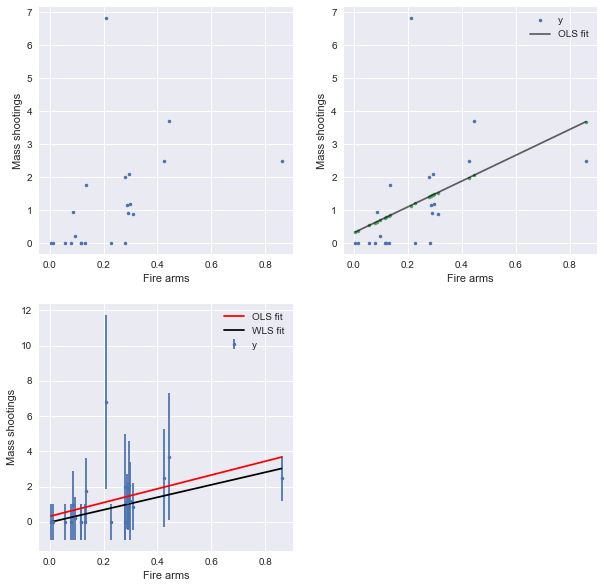

the plots should look something like this (not necessarily exactly, due to the choices of the error


## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

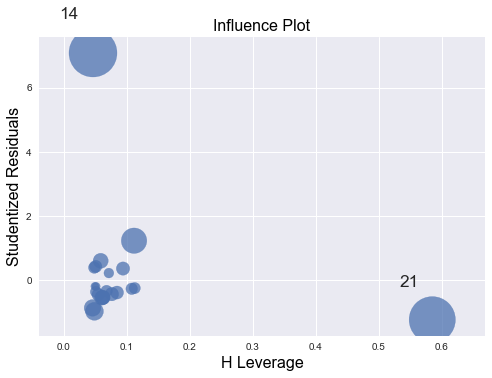

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



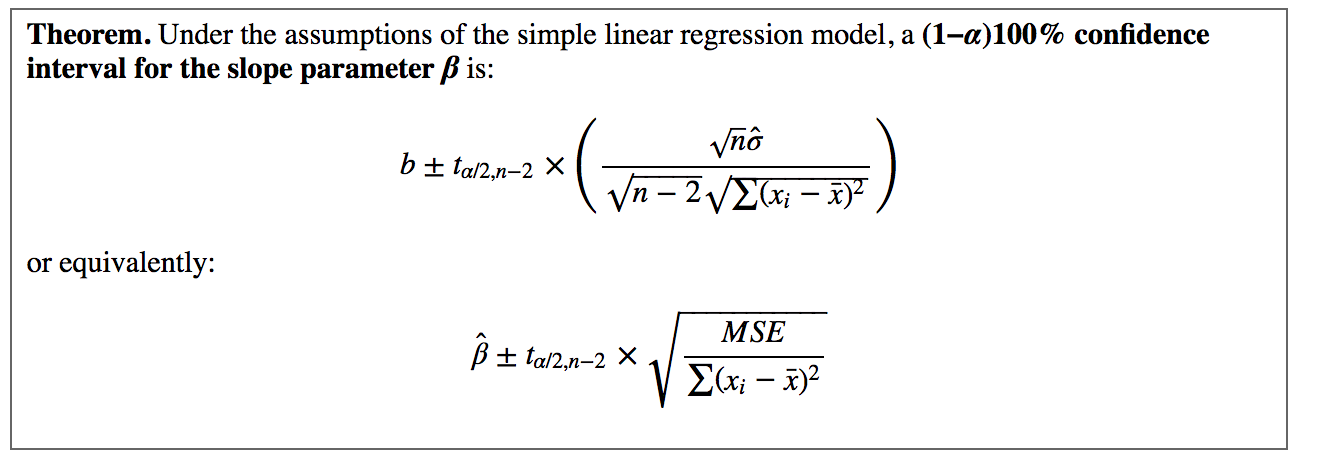

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

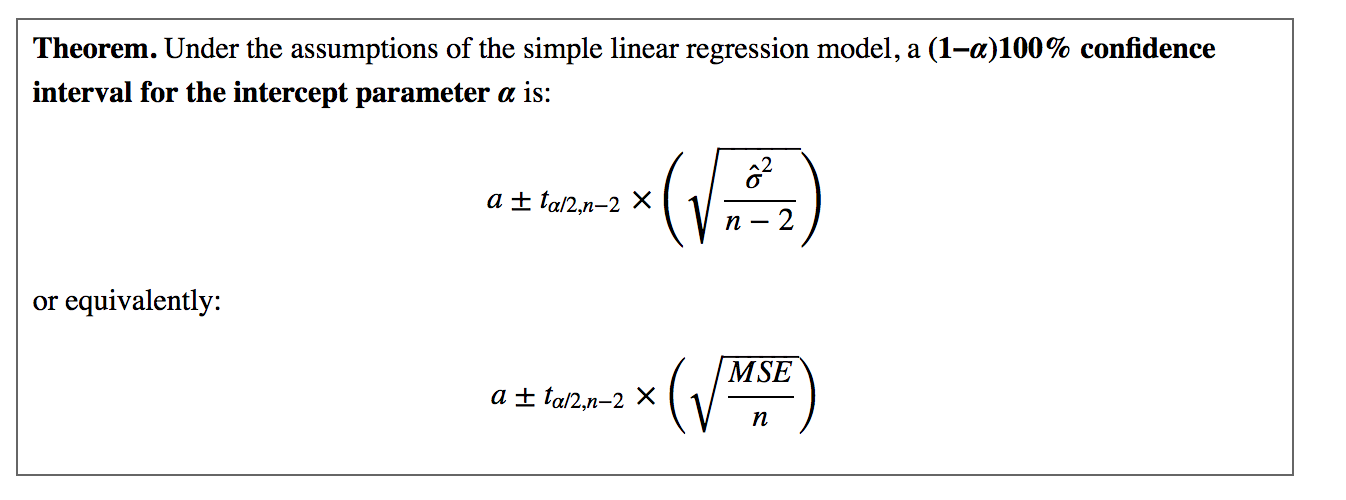

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

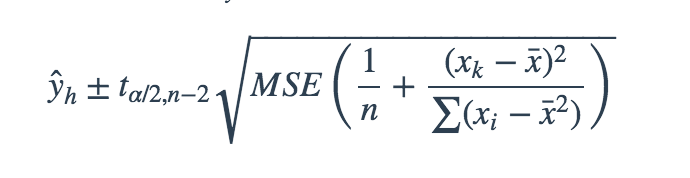

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

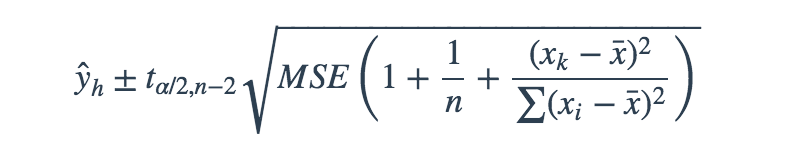

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

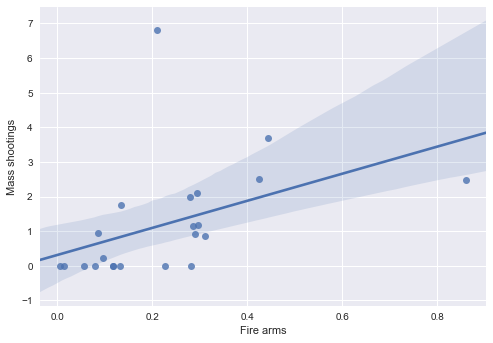

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings